In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/인구대비데이터정리.csv'
df = pd.read_csv(df)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
!sudo apt install -y fonts-nanum*  > /dev/null
!sudo fc-cache -fv                 > /dev/null
!rm ~/.cache/matplotlib -rf        > /dev/null
mpl.rc('font', family='NanumGothic')

mpl.rc('axes', unicode_minus=False)

In [ ]:
df.head(3)

,Unnamed: 0,시도코드,시도명,십만명당 회피가능사망율,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수
0,0,11,서울특별시,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859
1,1,21,부산광역시,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495
2,2,22,대구광역시,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563


In [ ]:
df.columns

Index(['Unnamed: 0', '시도코드', '시도명', '십만명당 회피가능사망율', '총 인구', '주민등록인구', '의료인수합계',
       '의사', '간호사', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '병상수합계', '천명당 병상수',
       '요양기관합계', '상급종합병원', '종합병원', '병원', '의원', '천명당 요양기관수', '천명당 상급+종합병원수'],
      dtype='object')

In [ ]:
df2 = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/회피가능사망율(KOSIS_2015).csv'
df2 = pd.read_csv(df2)


In [ ]:
df2.rename(columns={'시도명':'시도코드'},inplace=True)

In [ ]:
df3 = pd.merge(df, df2, on='시도코드')
df3.head()

,Unnamed: 0_x,시도코드,시도명,십만명당 회피가능사망율,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수,Unnamed: 0_y,사망률
0,0,11,서울특별시,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859,0,44.6
1,1,21,부산광역시,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495,1,55.3
2,2,22,대구광역시,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563,2,54.2
3,3,23,인천광역시,65.645136,2952237,2957026,24081,5071,11639,8.143655,1.714899,3.936049,34176,11.6,1677,3,16,62,1573,0.567124,0.006425,3,53.9
4,4,24,광주광역시,60.682137,1489730,1456468,17835,3658,8949,12.245377,2.511555,6.144316,40206,27.6,1075,2,21,80,948,0.738087,0.015792,4,52.4


- 산점도

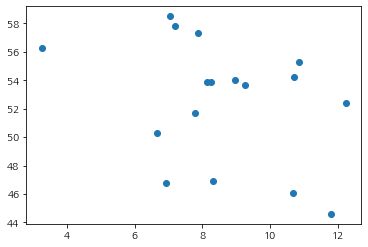

In [ ]:
#@title 기본 제목 텍스트
plt.scatter(df3['천명당 의료인수'], df3['사망률'])
plt.show()

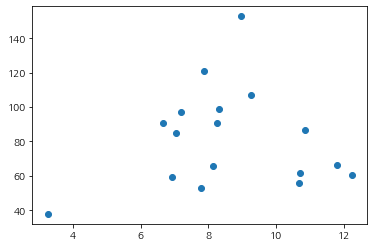

In [ ]:
plt.scatter(df['천명당 의료인수'], df['십만명당 회피가능사망율'])
plt.show()

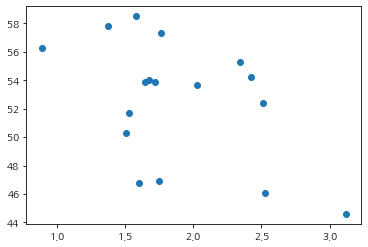

In [ ]:
plt.scatter(df3['천명당 의사수'], df3['사망률'])
plt.show()

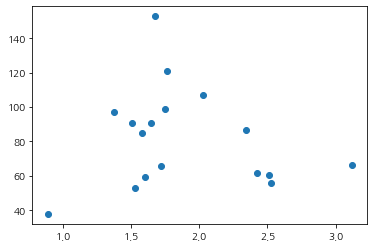

In [ ]:
plt.scatter(df['천명당 의사수'], df['십만명당 회피가능사망율'])
plt.show()

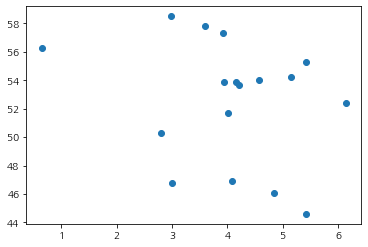

In [ ]:
plt.scatter(df3['천명당 간호사수'], df3['사망률'])
plt.show()

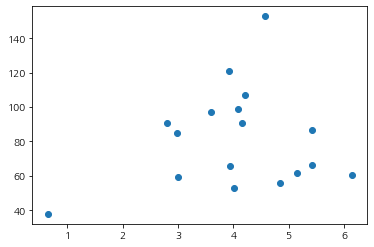

In [ ]:
plt.scatter(df['천명당 간호사수'], df['십만명당 회피가능사망율'])
plt.show()

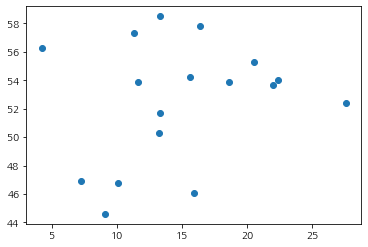

In [ ]:
plt.scatter(df3['천명당 병상수'], df3['사망률'])
plt.show()

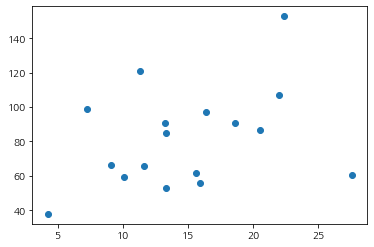

In [ ]:
plt.scatter(df['천명당 병상수'], df['십만명당 회피가능사망율'])
plt.show()

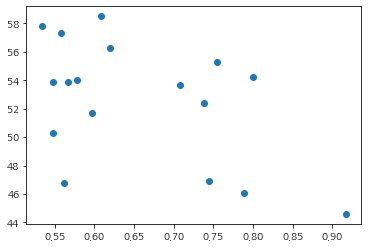

In [ ]:
plt.scatter(df3['천명당 요양기관수'], df3['사망률'])
plt.show()

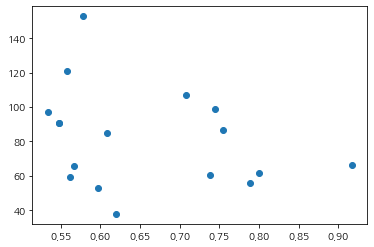

In [ ]:
plt.scatter(df['천명당 요양기관수'], df['십만명당 회피가능사망율'])
plt.show()

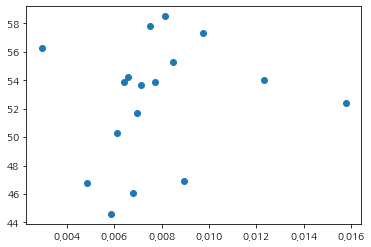

In [ ]:
plt.scatter(df3['천명당 상급+종합병원수'], df3['사망률'])
plt.show()

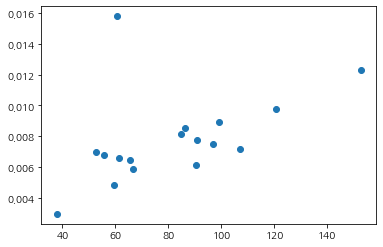

In [ ]:
plt.scatter(df['십만명당 회피가능사망율'],df['천명당 상급+종합병원수'])
plt.show()

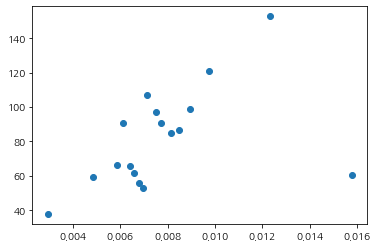

In [ ]:
plt.scatter(df['천명당 상급+종합병원수'], df['십만명당 회피가능사망율'])
plt.show()

In [ ]:
x = df['천명당 상급+종합병원수'].values
y = df['십만명당 회피가능사망율'].values

np.corrcoef(x, y)

array([[1.       , 0.4663536],
       [0.4663536, 1.       ]])

In [ ]:
import scipy.stats as stats
stats.pearsonr(x,y)

(0.4663535990102259, 0.05916527819705734)

In [ ]:
from scipy.stats import pearsonr

corr1, _ = pearsonr(x, y)
print('Pearsons correlation between data1 and data2: %.3f' % corr1)

Pearsons correlation between data1 and data2: 0.466


In [ ]:
x = df3['천명당 상급+종합병원수'].values
y = df3['사망률'].values

np.corrcoef(x, y)

array([[1.        , 0.15584752],
       [0.15584752, 1.        ]])

In [ ]:
x = df3['천명당 의료인수'].values
y = df3['사망률'].values

np.corrcoef(x, y)

array([[ 1.        , -0.35178676],
       [-0.35178676,  1.        ]])

In [ ]:
x = df3['천명당 요양기관수'].values
y = df3['사망률'].values

np.corrcoef(x, y)

array([[ 1.        , -0.50283198],
       [-0.50283198,  1.        ]])

In [ ]:
x = df3['천명당 병상수'].values
y = df3['사망률'].values

np.corrcoef(x, y)

array([[1.        , 0.22191538],
       [0.22191538, 1.        ]])

In [ ]:
c = df[['시도코드', '시도명', '십만명당 회피가능사망율', '의료인수합계',
       '의사', '간호사', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '병상수합계', '천명당 병상수',
       '요양기관합계', '상급종합병원', '종합병원', '병원', '의원', '천명당 요양기관수', '천명당 상급+종합병원수']]

In [ ]:
corr = c.corr(method='pearson')
corr

,시도코드,십만명당 회피가능사망율,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수
시도코드,1.000000,0.556786,-0.533087,-0.564911,-0.550502,-0.538182,-0.696295,-0.437508,-0.265443,0.055319,-0.513396,-0.725271,-0.270318,-0.386217,-0.519166,-0.667674,0.119711
십만명당 회피가능사망율,0.556786,1.000000,-0.196659,-0.210410,-0.181895,0.051419,-0.108371,0.152809,-0.064053,0.345836,-0.213013,-0.211926,-0.022176,-0.125766,-0.217645,-0.288016,0.466354
의료인수합계,-0.533087,-0.196659,1.000000,0.995595,0.998180,0.334080,0.507201,0.254954,0.869579,-0.161385,0.997565,0.897734,0.900645,0.924735,0.997015,0.369720,-0.246336
의사,-0.564911,-0.210410,0.995595,1.000000,0.993873,0.339401,0.531964,0.250438,0.821846,-0.198170,0.994518,0.918378,0.862047,0.889090,0.995314,0.416966,-0.260248
간호사,-0.550502,-0.181895,0.998180,0.993873,1.000000,0.367114,0.531655,0.293165,0.866929,-0.133928,0.991989,0.908422,0.896367,0.925658,0.991289,0.385658,-0.221232
천명당 의료인수,-0.538182,0.051419,0.334080,0.339401,0.367114,1.000000,0.935712,0.976004,0.279107,0.591374,0.288650,0.499847,0.254191,0.352087,0.286764,0.714701,0.530477
천명당 의사수,-0.696295,-0.108371,0.507201,0.531964,0.531655,0.935712,1.000000,0.849739,0.330385,0.343155,0.474080,0.695879,0.315382,0.436381,0.475689,0.850268,0.282124
천명당 간호사수,-0.437508,0.152809,0.254954,0.250438,0.293165,0.976004,0.849739,1.000000,0.248338,0.641208,0.204624,0.394394,0.232638,0.310321,0.201158,0.588526,0.619829
병상수합계,-0.265443,-0.064053,0.869579,0.821846,0.866929,0.279107,0.330385,0.248338,1.000000,0.128676,0.860022,0.660609,0.963266,0.978391,0.852150,0.096487,-0.116065
천명당 병상수,0.055319,0.345836,-0.161385,-0.198170,-0.133928,0.591374,0.343155,0.641208,0.128676,1.000000,-0.208610,-0.111721,0.039573,0.068223,-0.218151,0.060237,0.723641


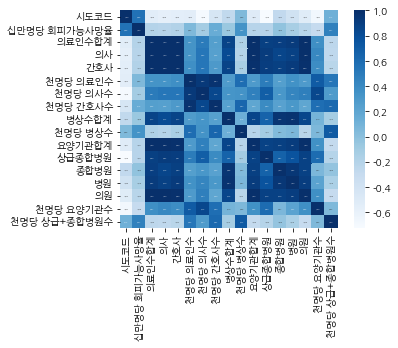

In [ ]:
import seaborn as sns

df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 2}, fmt = '.2f', square = True, cmap = 'Blues')
